# Data Visualization
## 패키지 import 및 matplotlib 한글 설정

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

## Sample Data

In [2]:
df = pd.read_excel('시도별 전출입 인구수.xlsx', header=0)

In [3]:
# 누락된 데이터를 이전 데이터로 채움
df = df.fillna(method='ffill')
# 서울에서 다른 지역으로 이동한 데이터만 추출
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop('전출지별', axis=1, inplace=True)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

/tmp/ipykernel_41032/305764484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop('전출지별', axis=1, inplace=True)
/tmp/ipykernel_41032/305764484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)


In [4]:
#'경기도'에서 서울로 전입한 데이터를 선택하여 Series로 할당
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

## 선 그래프


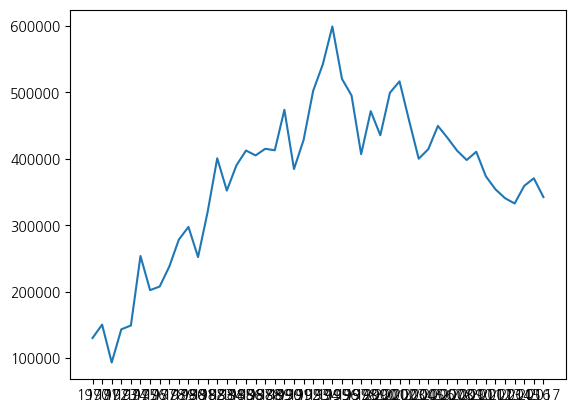

In [5]:
plt.plot(sr_one)

### 차트 제목, 축 이름 추가

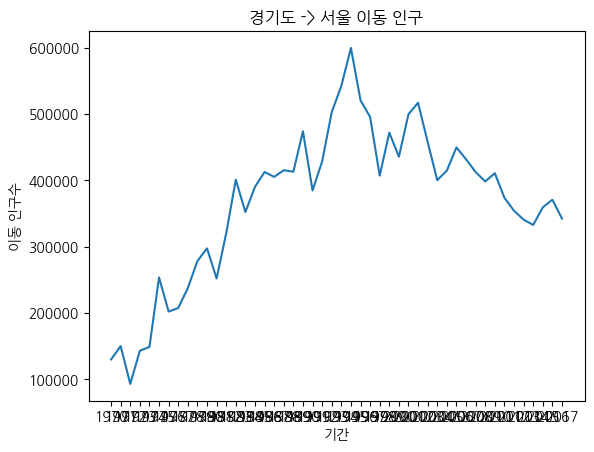

In [6]:
plt.plot(sr_one.index, sr_one.values)
plt.title('경기도 -> 서울 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

### 그래프 설정

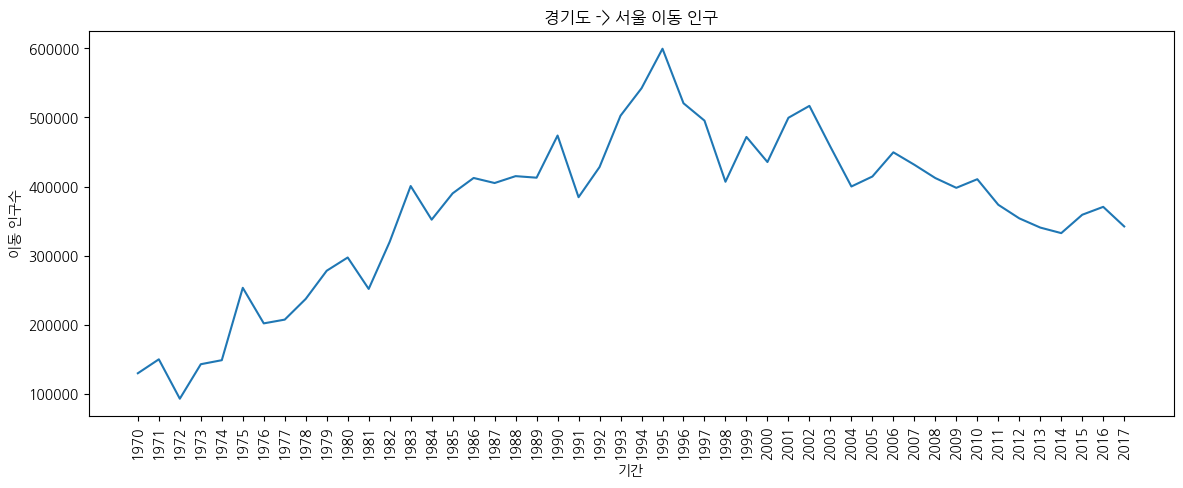

In [7]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation='vertical')
plt.plot(sr_one)
plt.title('경기도 -> 서울 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

### 스타일 설정

In [8]:
plt.style.use('ggplot')

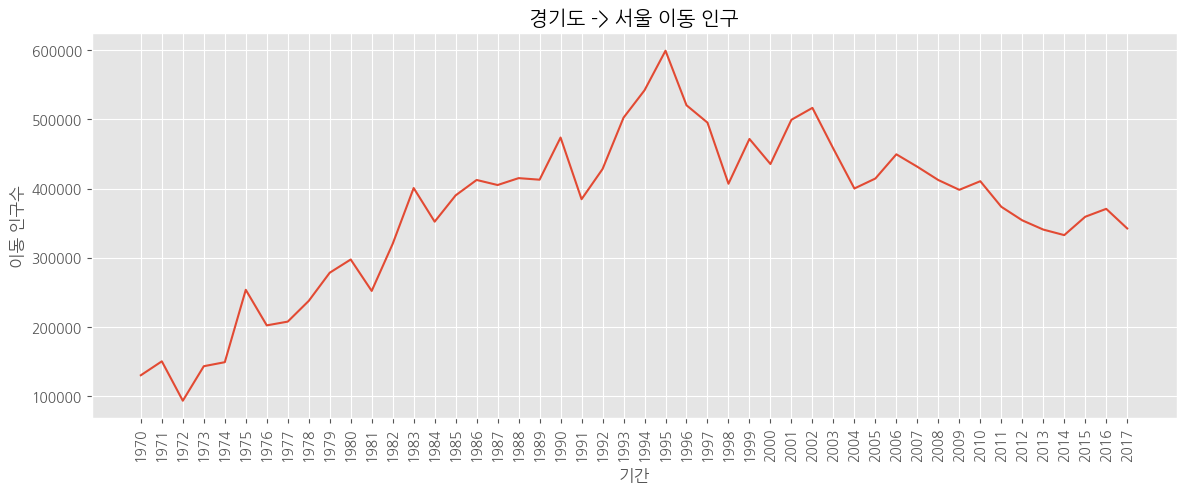

In [9]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation='vertical')
plt.plot(sr_one)
plt.title('경기도 -> 서울 이동 인구')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

### 화면 분할, 여러개 그래프 작성

/tmp/ipykernel_41032/637083848.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
/tmp/ipykernel_41032/637083848.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


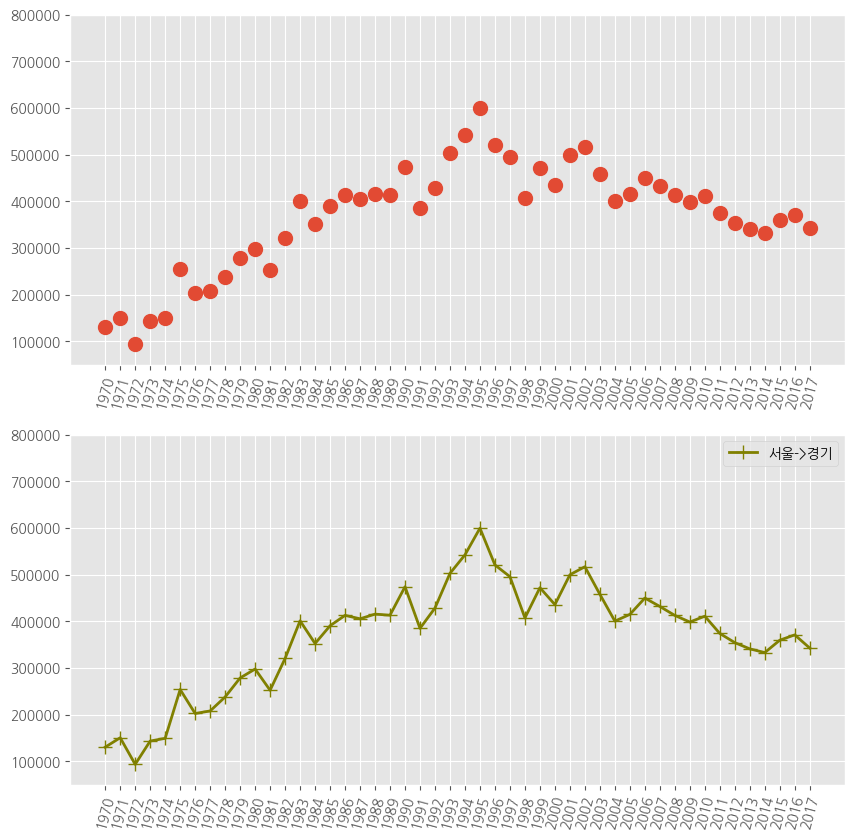

In [10]:
# 그래프 객체 생성(figure에 2개의 서브 플롯 생성)
fig = plt.figure(figsize=(10, 10))
# add_subplot(row 크기, column 크기, 서브 플롯 순서)
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

# axe 객체에 plot 함수로 그래프 출력
ax1.plot(sr_one, marker='o', markersize=10, linewidth=0)
ax2.plot(sr_one, marker='+', markerfacecolor='green',markersize=10, color='olive', linewidth=2, label='서울->경기')
ax2.legend(loc='best')

# y축 범위 지정
ax1.set_ylim(50000, 800000)
ax2.set_ylim(50000, 800000)

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()

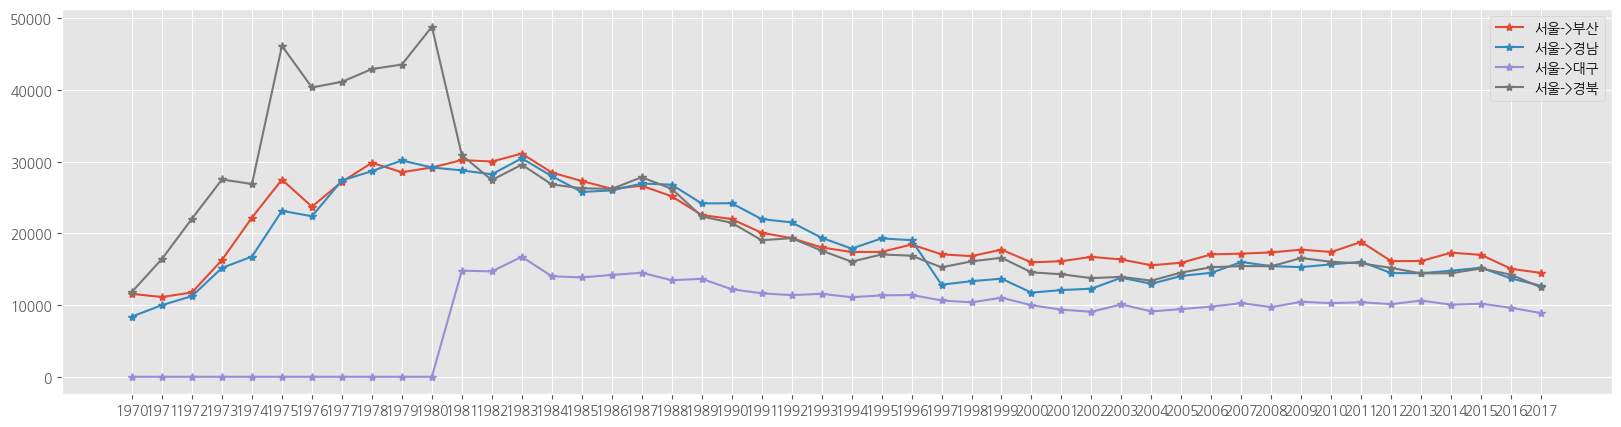

In [11]:
col_years = list(map(str, range(1970, 2018)))
df_2 = df_seoul.loc[['부산광역시','경상남도','대구광역시','경상북도'], col_years]

years = list(map(str, range(1970, 1981)))
df_2.loc['대구광역시', years] = 0

plt.style.use('ggplot')

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df_2.loc['부산광역시'], label='서울->부산', marker='*')
ax.plot(df_2.loc['경상남도'], label='서울->경남', marker='*')
ax.plot(df_2.loc['대구광역시'], label='서울->대구', marker='*')
ax.plot(df_2.loc['경상북도'], label='서울->경북', marker='*')

ax.legend(loc='best')

plt.show()

## 면적 그래프

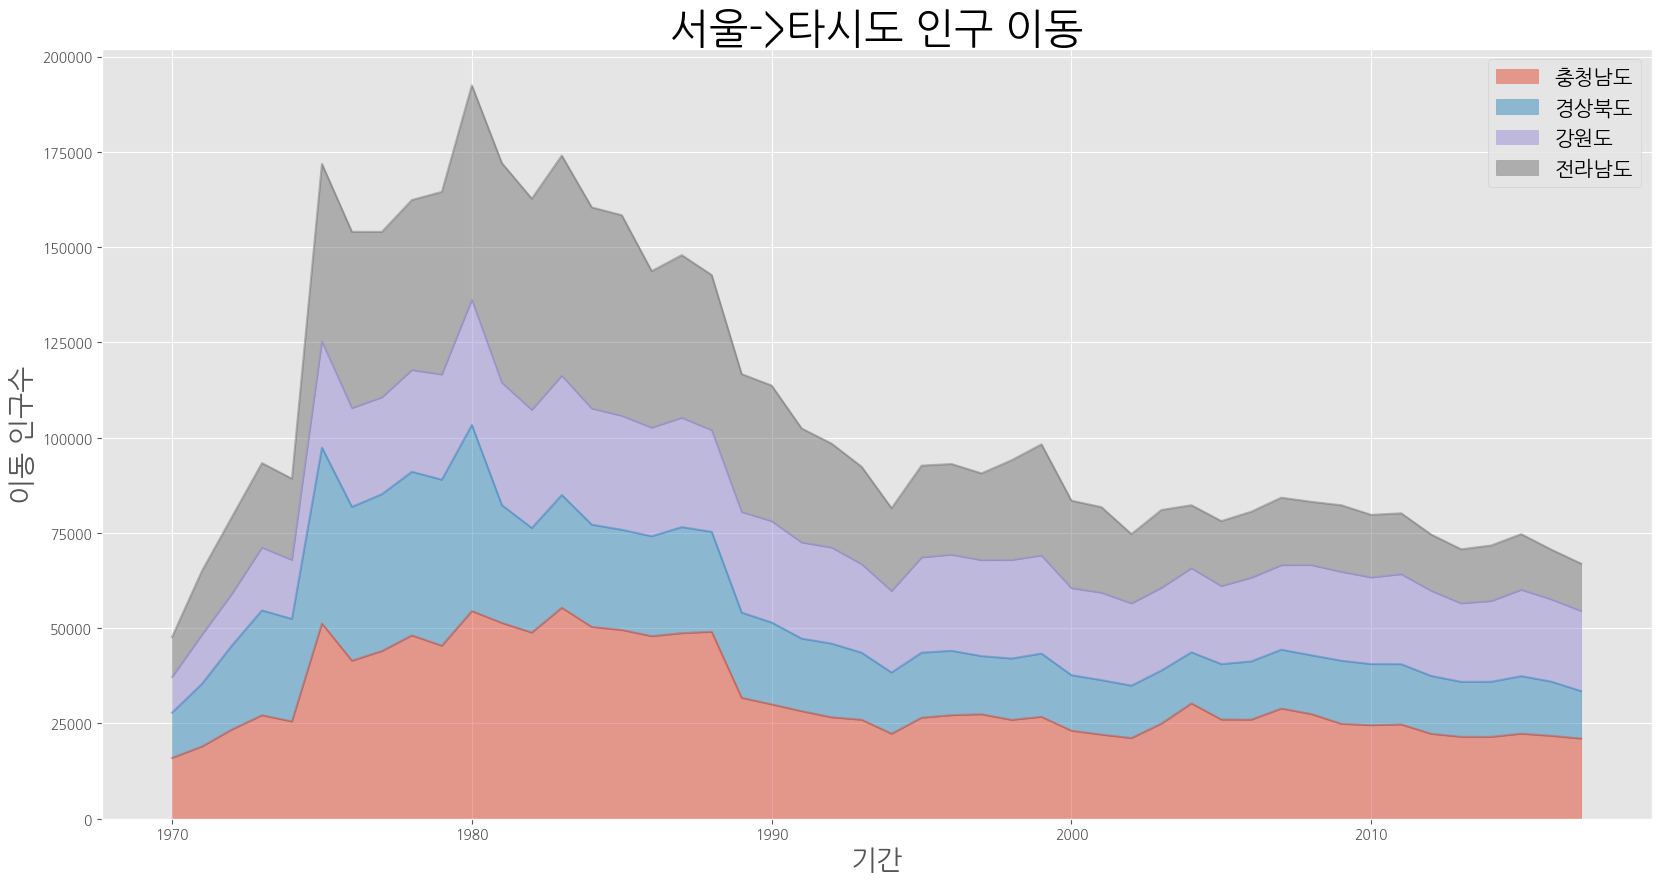

In [12]:
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df_4 = df_3.transpose()

plt.style.use('ggplot')

#df_4.index = df_4.index.map(int)
df_4.plot(kind='area', stacked=True, alpha=0.5, figsize=(20, 10))

plt.title('서울->타시도 인구 이동', size=30)
plt.ylabel('이동 인구수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best',fontsize=15)

plt.show()

## 막대 그래프

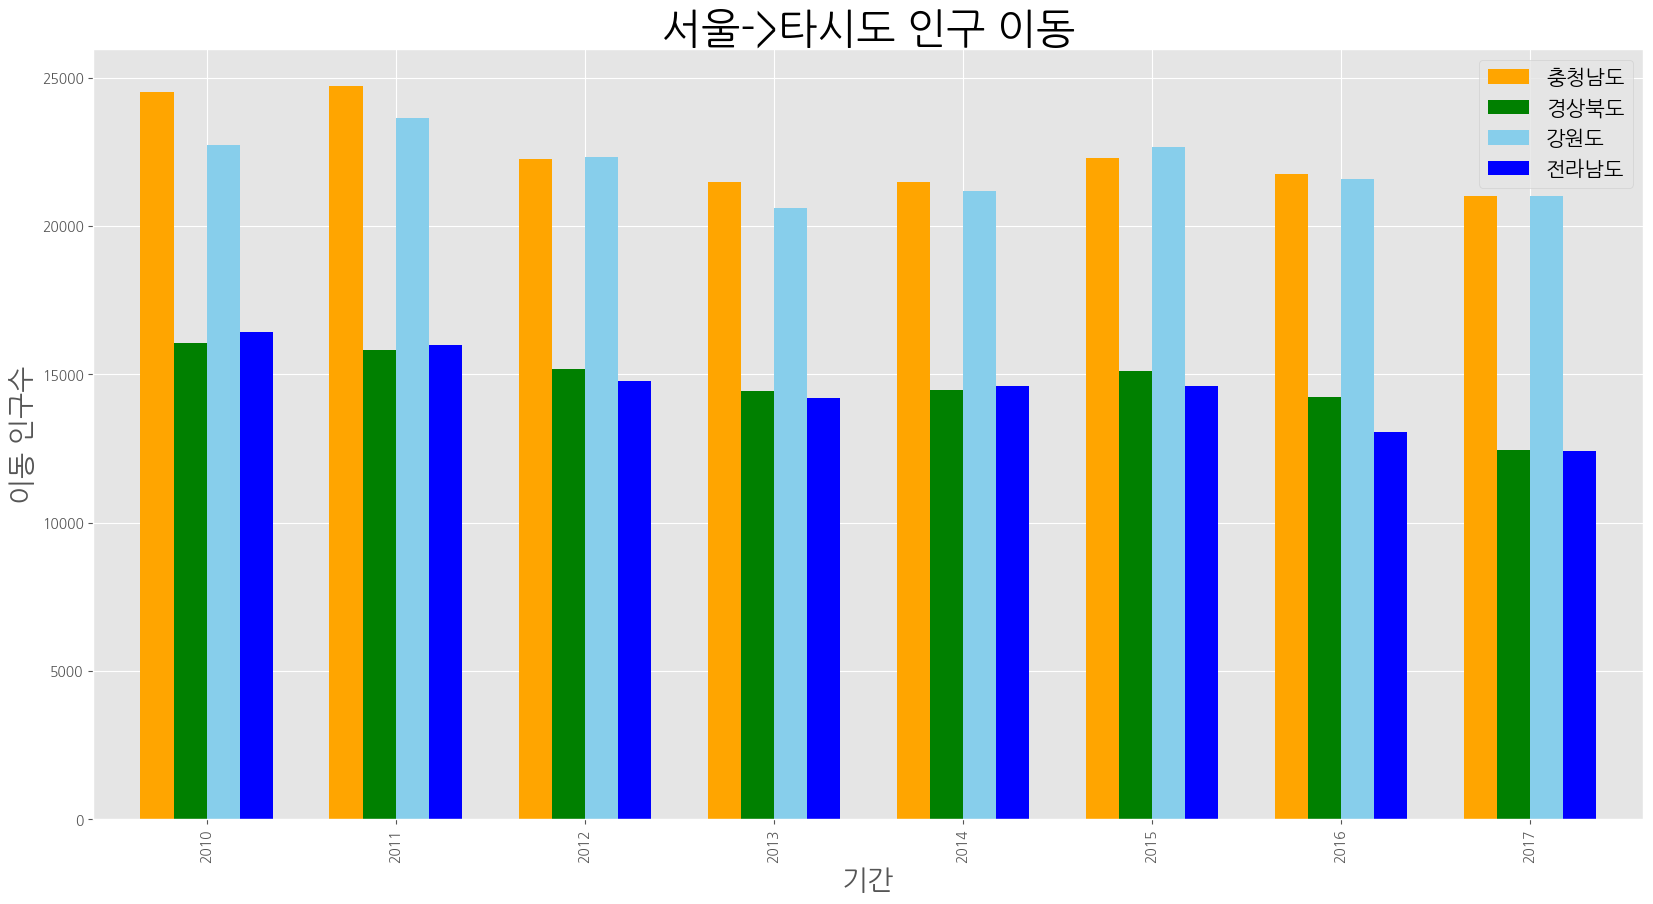

In [13]:
col_years = list(map(str, range(2010, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df_4 = df_3.transpose()

plt.style.use('ggplot')

#df_4.index = df_4.index.map(int)
df_4.plot(kind='bar',figsize=(20, 10),width=0.7,color=['orange','green','skyblue','blue'])

plt.title('서울->타시도 인구 이동', size=30)
plt.ylabel('이동 인구수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best',fontsize=15)

plt.show()

### 가로형 막대 그래프

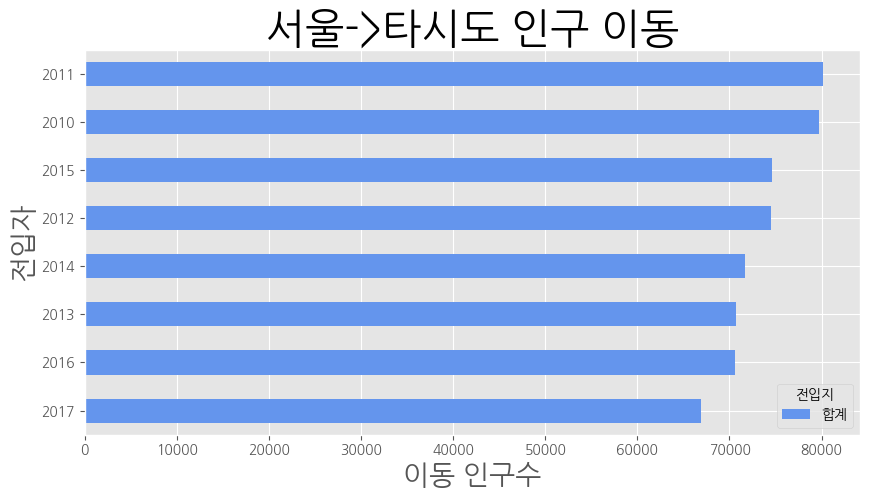

In [14]:
col_years = list(map(str, range(2010, 2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df_4 = df_3.transpose()

df_4['합계'] = df_4.sum(axis=1)

df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

plt.style.use('ggplot')

df_total.plot(kind='barh',figsize=(10,5),width=0.5,color='cornflowerblue')

plt.title('서울->타시도 인구 이동', size=30)
plt.ylabel('전입자', size=20)
plt.xlabel('이동 인구수', size=20)

plt.show()

## 히스토그램

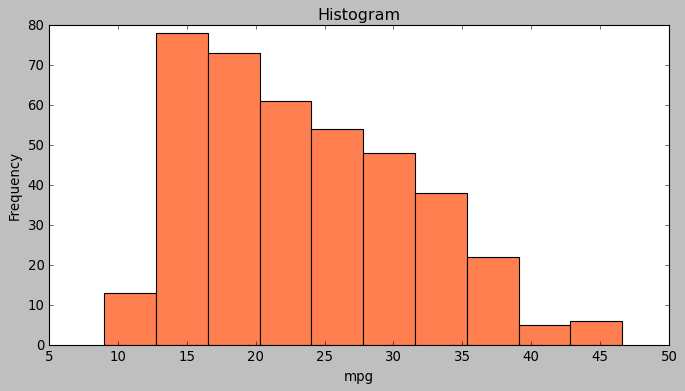

In [15]:
plt.style.use('classic')

df_car = pd.read_csv('./auto-mpg.csv', header=None)

df_car.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df_car['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

## 산점도

/home/gikpreet/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from current font.
  fig.canvas.pr

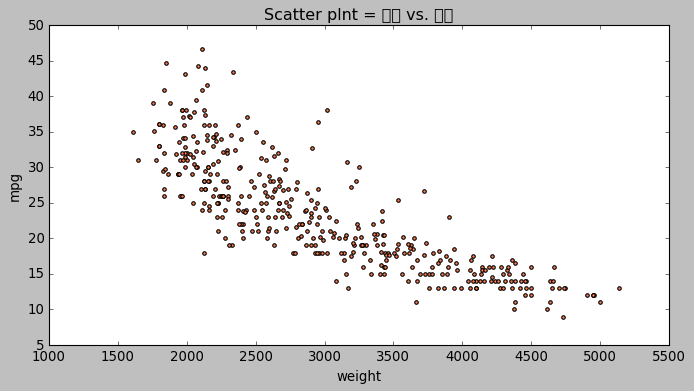

In [16]:
df_car.plot(kind='scatter',x='weight',y='mpg',c='coral',s=10,figsize=(10,5))
plt.title('Scatter plnt = 연비 vs. 무게')
plt.show()


### 버블차트(bubble chart)

/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


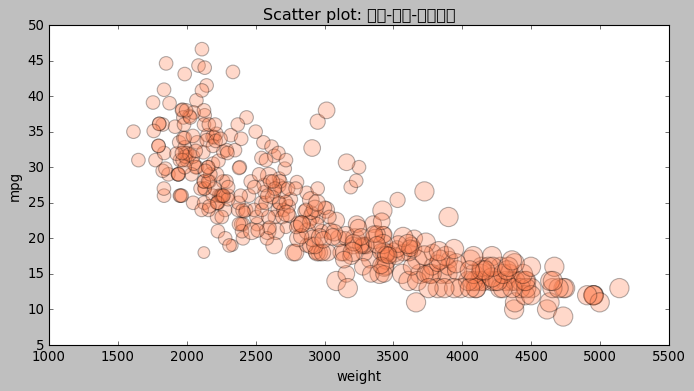

In [17]:
cylinders_size = df_car.cylinders / df_car.cylinders.max() * 300

df_car.plot(kind='scatter',x='weight',y='mpg',c='coral',figsize=(10,5),s=cylinders_size, alpha=0.3)
plt.title('Scatter plot: 연비-무게-실린더수')
plt.show()

## 파이 차트

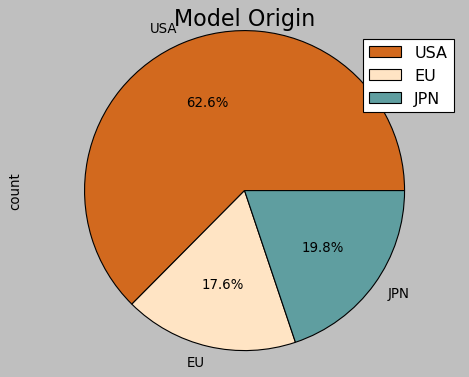

In [18]:
df_car['count'] = 1
df_origin = df_car.groupby('origin').sum()

df_origin.index = ['USA','EU','JPN']

df_origin['count'].plot(kind='pie',
                        figsize=(7,5), autopct='%1.1f%%',startangle=0,colors=['chocolate','bisque','cadetblue'])

plt.title('Model Origin', size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

## 박스 플롯

/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/gikpreet/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print

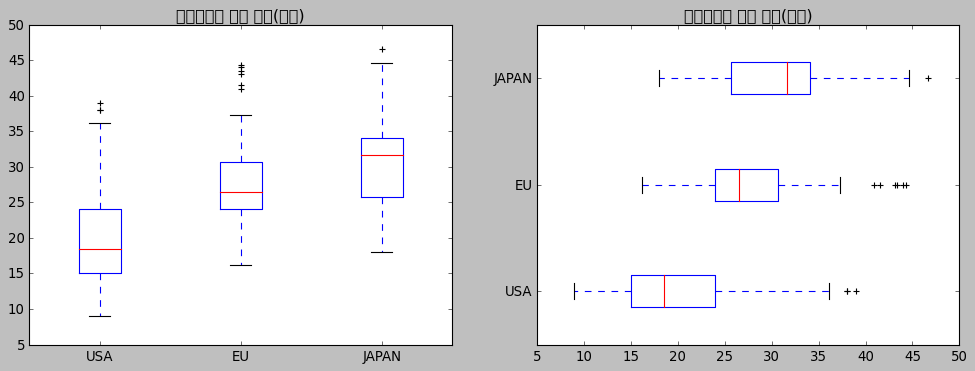

In [19]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df_car[df_car['origin']==1]['mpg'],
               df_car[df_car['origin']==2]['mpg'],
               df_car[df_car['origin']==3]['mpg']],
               labels=['USA','EU','JAPAN'])
ax2.boxplot(x=[df_car[df_car['origin']==1]['mpg'],
               df_car[df_car['origin']==2]['mpg'],
               df_car[df_car['origin']==3]['mpg']],
               labels=['USA','EU','JAPAN'],
               vert=False)
ax1.set_title('제조국가별 연비 분포(수직)')
ax2.set_title('제조국가별 연비 분포(수평)')

plt.show()

## 연습문제

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
# spss 형식 파일을 읽기 위해 아래 명령을 실행해 패키지 설치
# conda install -c conda-forge pyreatstat
# 실패하면 아래 명령으로 설치
# pip install pyreatstat
raw_welpare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
raw_welpare

PyreadstatError: File Koweps_hpwc14_2019_beta2.sav does not exist!

## seaborn

In [ ]:
import seaborn as sns

### Sample Data

In [ ]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 산점도

<Axes: xlabel='age', ylabel='fare'>

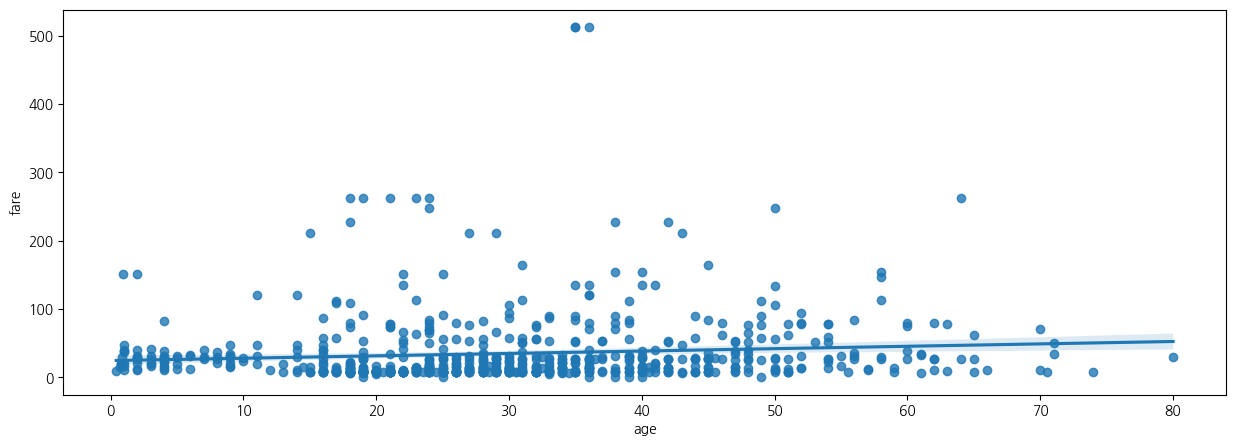

In [ ]:
fig = plt.figure(figsize=(15, 5))
sns.regplot(x='age',y='fare',data=df_titanic)

### 히스토그램

/tmp/ipykernel_151811/1564300639.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic['fare'], ax=ax1)
/tmp/ipykernel_151811/1564300639.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_titanic['fare'], hist=False, ax=ax2)
/tmp/ipykernel_151811/1564300639.py:8: UserWarnin

Text(0.5, 1.0, '요금 - hist')

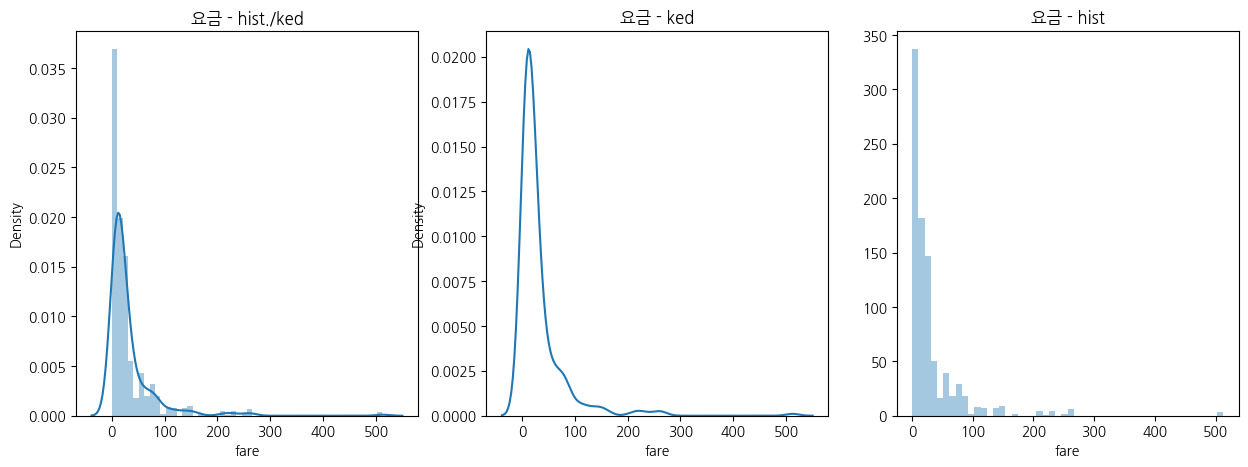

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(df_titanic['fare'], ax=ax1)
sns.distplot(df_titanic['fare'], hist=False, ax=ax2)
sns.distplot(df_titanic['fare'], kde=False, ax=ax3)

ax1.set_title('요금 - hist./ked')
ax2.set_title('요금 - ked')
ax3.set_title('요금 - hist')


### 히트맵

<Axes: xlabel='class', ylabel='sex'>

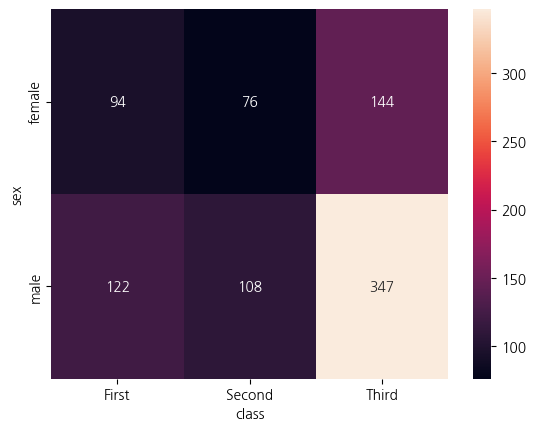

In [ ]:
table = df_titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
sns.heatmap(table,
            annot=True, fmt='d',
            cbar=True)

### 막대 그래프

Text(0.5, 1.0, '타이타닉 생존자 - 성별/객실등급(stacked)')

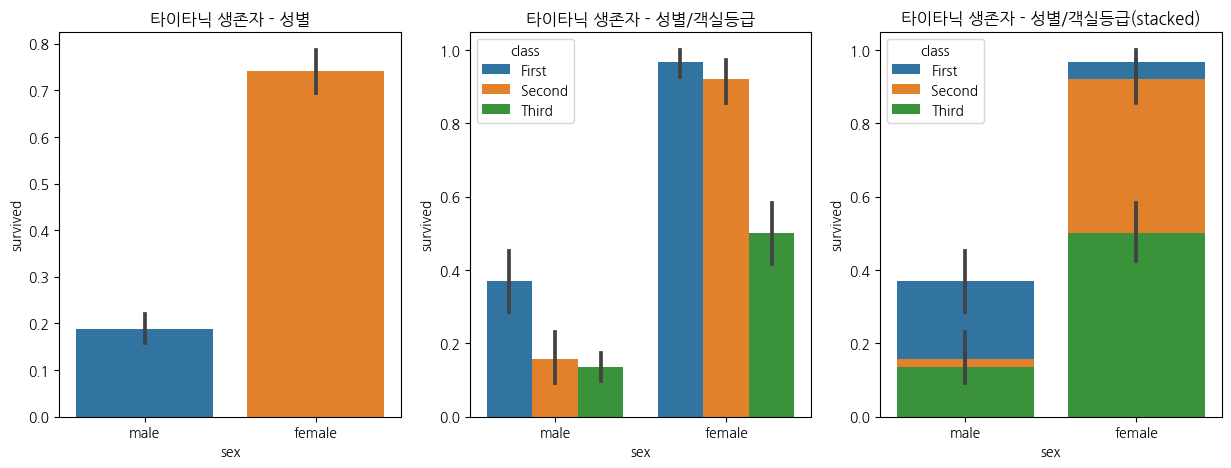

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(x='sex', y='survived', data=df_titanic, ax=ax1)
sns.barplot(x='sex', y='survived', hue='class', data=df_titanic, ax=ax2)
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=df_titanic, ax=ax3)

ax1.set_title('타이타닉 생존자 - 성별')
ax2.set_title('타이타닉 생존자 - 성별/객실등급')
ax3.set_title('타이타닉 생존자 - 성별/객실등급(stacked)')

### 빈도 그래프

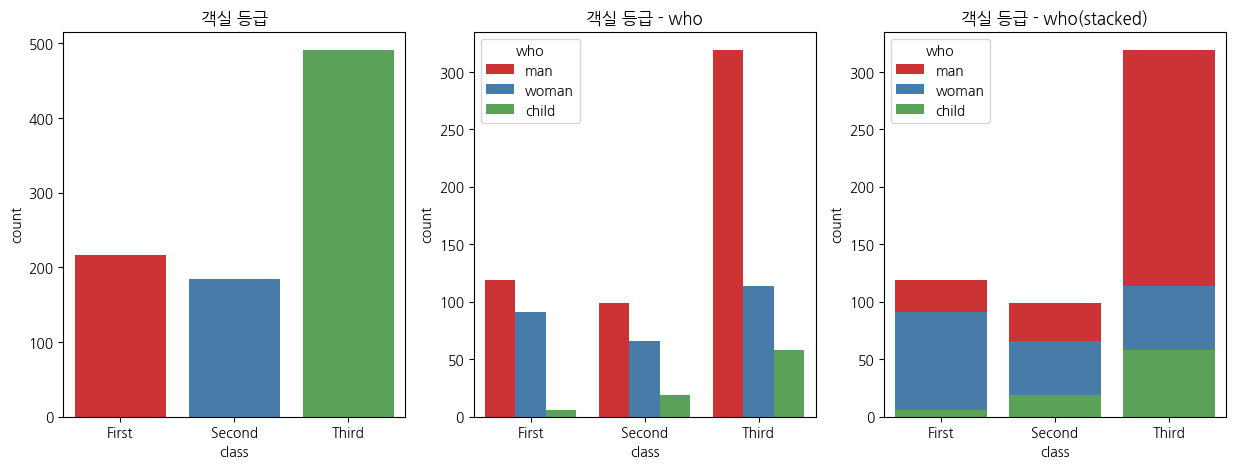

In [ ]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(x='class', palette='Set1',data=df_titanic, ax=ax1)
sns.countplot(x='class', hue='who', palette='Set1',data=df_titanic, ax=ax2)
sns.countplot(x='class', hue='who', palette='Set1',dodge=False,data=df_titanic, ax=ax3)

ax1.set_title('객실 등급')
ax2.set_title('객실 등급 - who')
ax3.set_title('객실 등급 - who(stacked)')

plt.show()

### 박스 플롯/바이올린 그래프

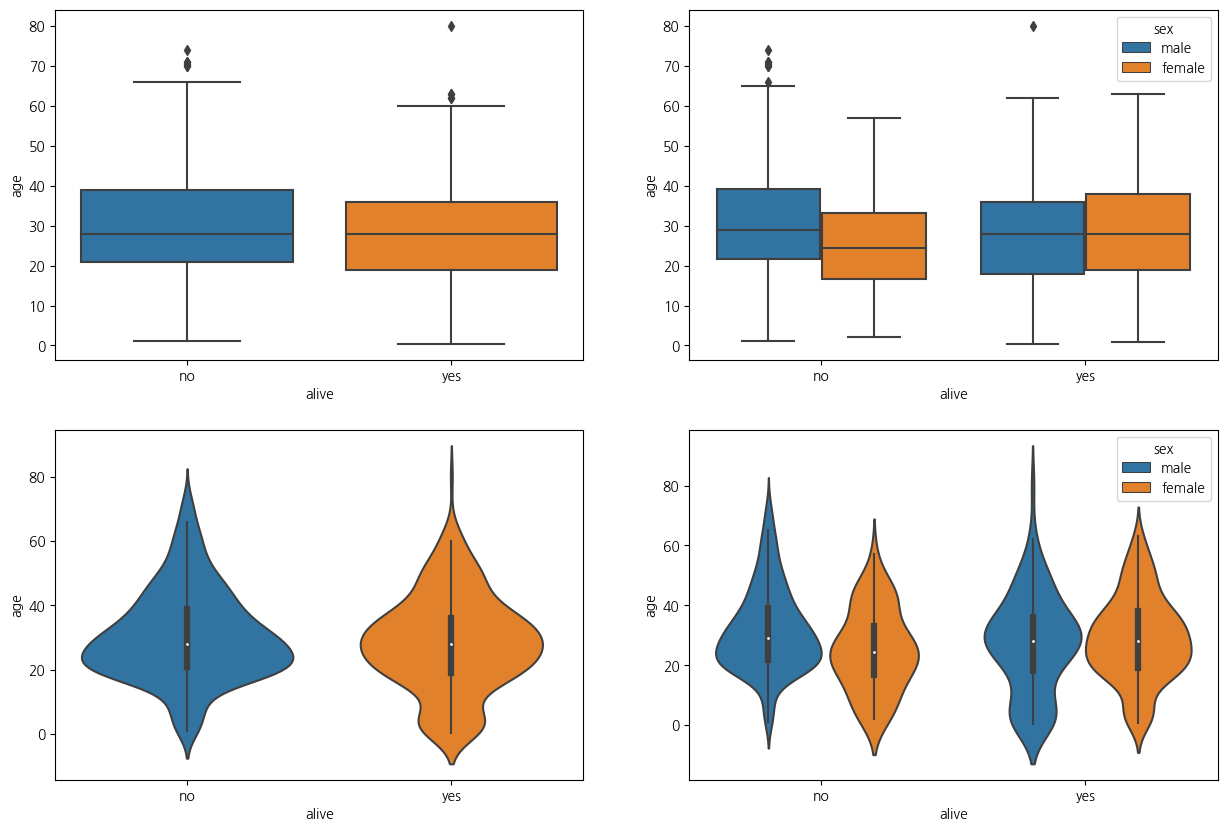

In [ ]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

sns.boxplot(x='alive',y='age',data=df_titanic,ax=ax1)
sns.boxplot(x='alive',y='age',hue='sex',data=df_titanic,ax=ax2)
sns.violinplot(x='alive',y='age',data=df_titanic,ax=ax3)
sns.violinplot(x='alive',y='age',hue='sex',data=df_titanic,ax=ax4)

plt.show()

### 조인트 그래프

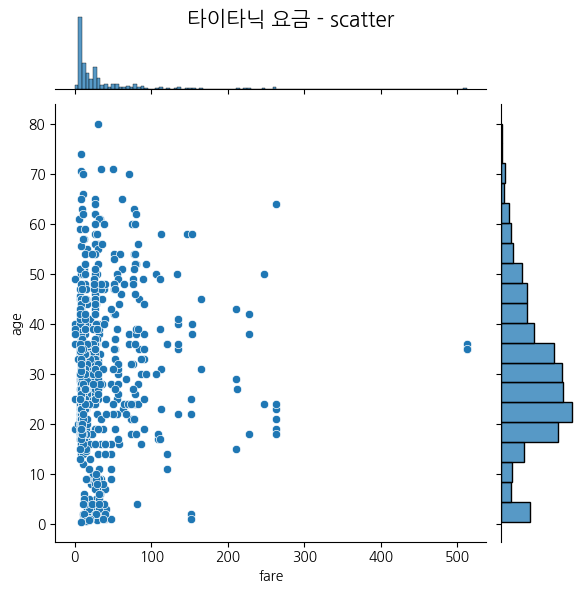

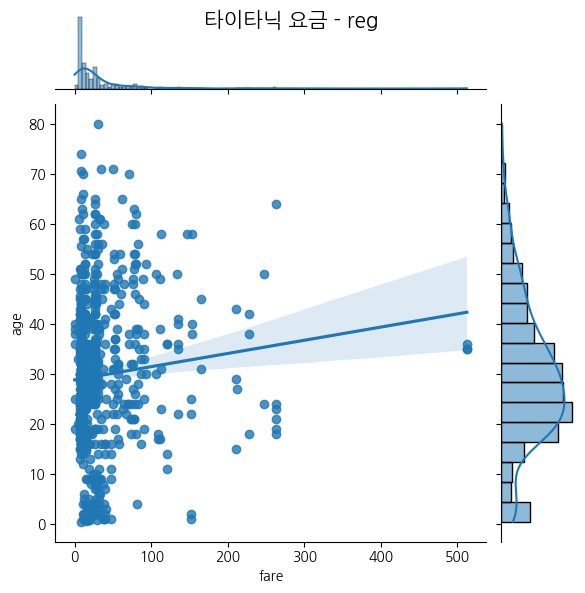

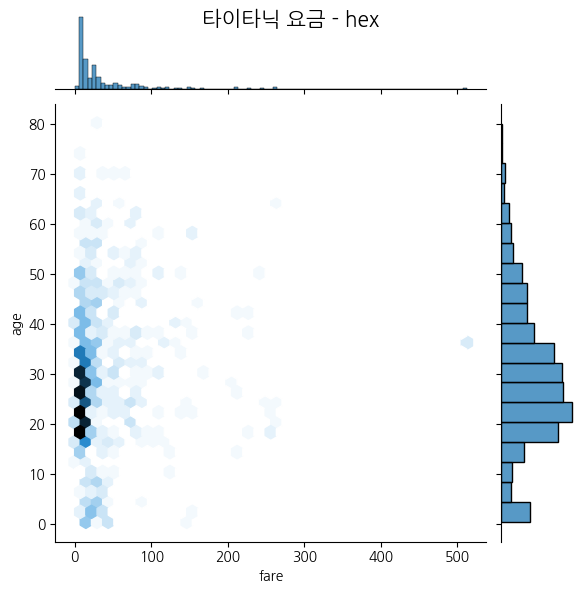

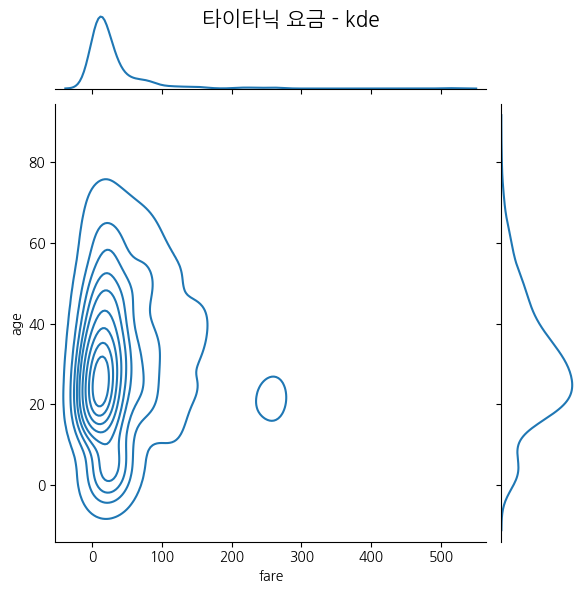

In [ ]:
j1 = sns.jointplot(x='fare',y='age',data=df_titanic)
j2 = sns.jointplot(x='fare',y='age',kind='reg',data=df_titanic)
j3 = sns.jointplot(x='fare',y='age',kind='hex',data=df_titanic)
j4 = sns.jointplot(x='fare',y='age',kind='kde',data=df_titanic)

j1.fig.suptitle('타이타닉 요금 - scatter', size=15)
j2.fig.suptitle('타이타닉 요금 - reg', size=15)
j3.fig.suptitle('타이타닉 요금 - hex', size=15)
j4.fig.suptitle('타이타닉 요금 - kde', size=15)

plt.show()

## Forum 라이브러리

In [ ]:
import folium

In [ ]:
seoulmap = folium.Map(location=[37.55,126.98], zoom_start=12)
seoulmap.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [ ]:
map = folium.Map(location=[35.235,128.8664], zoom_start=15)

folium.Marker(
    location=[35.235,128.8664],
    popup="NHN 아카데미 경남캠퍼스",
    icon=folium.Icon(icon="green"),
).add_to(map)

folium.Marker(
    location=[35.1403,126.9339],
    popup="NHN 아카데미 광주캠퍼스",
    icon=folium.Icon(icon="green"),
).add_to(map)

folium.Marker(
    location=[36.3677,127.3445],
    popup="NHN 아카데미 대전캠퍼스",
    icon=folium.Icon(icon="green"),
).add_to(map)

map.show_in_browser()

Your map should have been opened in your browser automatically.
Press ctrl+c to return.


In [ ]:
import json

df = pd.read_excel('경기도인구데이터.xlsx', index_col='구분')
df.columns = df.columns.map(str)

# 경기도 시군구 경계 정보를 가진 geo-json 파일 불러오기
geo_path = './경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path, encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path, encoding='utf-8-sig'))

# 경기도 지도 만들기
g_map = folium.Map(location=[37.5502,126.982], 
                   tiles='Stamen Terrain', zoom_start=9)

# 출력할 연도 선택 (2007 ~ 2017년 중에서 선택)
year = '2017'  

# Choropleth 클래스로 단계구분도 표시하기
folium.Choropleth(geo_data=geo_data,    # 지도 경계
                 data = df[year],      # 표시하려는 데이터
                 columns = [df.index, df[year]],  # 열 지정
                 fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.3,
                 threshold_scale=[10000, 100000, 300000, 500000, 700000],               
                 key_on='feature.properties.name',
                 ).add_to(g_map)

g_map.show_in_browser()
# 지도를 HTML 파일로 저장하기
# g_map.save('./gyonggi_population_' + year + '.html')

Your map should have been opened in your browser automatically.
Press ctrl+c to return.
